# Notebook 02: Regression Model

**Student Name:** [Doug Bacon]

**Dataset:** [electricity_cost.csv (cleaned)]

**Target Variable:** [electricity cost]

**Checkpoint 3 Due:** Feb 15

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before the checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll be asked to interpret results, justify decisions, and explain your reasoning. **These written reflections are a critical part of your grade.**

Good data scientists don't just run code—they communicate their findings clearly. Take time to write thoughtful, complete responses to all reflection prompts. This demonstrates your understanding and prepares you for real-world stakeholder communication.

---

## Setup

In [3]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn - preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Sklearn - models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Sklearn - evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model saving
import joblib

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


## Section 1: Load Processed Data

In [4]:
# Load cleaned data from previous notebook
df = pd.read_csv('../data/processed/cleaned_data.csv')

print(f"Data shape: {df.shape}")
df.head()

Data shape: (10000, 11)


,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost,structure type_Industrial,structure type_Mixed-Use,structure type_Residential
0,1360,2519.0,69,52,188,1,72,1420.0,False,True,False
1,4272,2324.0,50,76,165,65,261,3298.0,False,True,False
2,3592,2701.0,20,94,198,39,117,3115.0,False,True,False
3,966,1000.0,13,60,74,3,35,1575.0,False,False,True
4,4926,5990.0,23,65,32,57,185,4301.0,False,False,True


In [5]:
# Define your target variable
TARGET = 'electricity cost'  # <-- UPDATE THIS!

print(f"Target: {TARGET}")
print(f"\nTarget statistics:")
print(df[TARGET].describe())

# Store target range for later interpretation
target_range = df[TARGET].max() - df[TARGET].min()
target_std = df[TARGET].std()
print(f"\nTarget range: {target_range:,.2f}")
print(f"Target std: {target_std:,.2f}")

Target: electricity cost

Target statistics:
count    10000.000000
mean      2837.845000
std       1106.997441
min        500.000000
25%       1954.000000
50%       2760.000000
75%       3632.000000
max       6446.000000
Name: electricity cost, dtype: float64

Target range: 5,946.00
Target std: 1,107.00


## Section 2: Prepare Features and Target

In [6]:
# Separate features (X) and target (y)
X = df.drop(columns=[TARGET])
y = df[TARGET]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nAll features ({len(X.columns)}):")
print(X.columns.tolist())

Features shape: (10000, 10)
Target shape: (10000,)

All features (10):
['site area', 'water consumption', 'recycling rate', 'utilisation rate', 'air qality index', 'issue reolution time', 'resident count', 'structure type_Industrial', 'structure type_Mixed-Use', 'structure type_Residential']


In [7]:
# Check for any non-numeric columns that need to be handled
non_numeric = X.select_dtypes(include=['object', 'category']).columns.tolist()
if non_numeric:
    print(f"Warning: Non-numeric columns found: {non_numeric}")
    print("You need to encode these or go back to Notebook 01!")
else:
    print("All features are numeric. Ready to proceed!")

All features are numeric. Ready to proceed!


## Section 3: Train-Test Split

Split your data into training and test sets. The training set is used to train the model, and the test set is used to evaluate how well it generalizes to unseen data.

In [8]:
# TODO: Split your data into training and test sets
# 
# Requirements:
# - Use an 80/20 split (test_size=0.2)
# - Set random_state=42 for reproducibility
# - Store results in: X_train, X_test, y_train, y_test
#
# Hint: Use train_test_split(X, y, ...)

# YOUR CODE HERE:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [9]:
# Verify your split (run this cell to check)
print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.0f}%)")

Training set: 8,000 samples (80%)
Test set: 2,000 samples (20%)


## Section 4: Feature Scaling

Many ML algorithms perform better when features are on similar scales. StandardScaler transforms features to have mean=0 and std=1.

**Important:** Fit the scaler on training data only, then transform both train and test. This prevents data leakage.

In [10]:
# TODO: Scale your features using StandardScaler
#
# Steps:
# 1. Create a StandardScaler instance
# 2. Fit the scaler on X_train and transform X_train (use fit_transform)
# 3. Transform X_test using the same scaler (use transform only - NOT fit_transform!)
# 4. Store results in: X_train_scaled, X_test_scaled
#
# Why fit only on train? To prevent "data leakage" - test data should be truly unseen.

# YOUR CODE HERE:

# 1. Create a StandardScaler instance
scaler = StandardScaler()

# 2. Fit on X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform X_test using the SAME scaler
X_test_scaled = scaler.transform(X_test)


In [11]:
# Convert back to DataFrame for easier viewing (optional but helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Verify scaling worked
print("Features scaled successfully!")
print(f"\nScaled feature means (should be ~0): {X_train_scaled.mean().mean():.4f}")
print(f"Scaled feature stds (should be ~1): {X_train_scaled.std().mean():.4f}")

Features scaled successfully!

Scaled feature means (should be ~0): -0.0000
Scaled feature stds (should be ~1): 1.0001


## Section 5: Baseline Model

Start with a simple Linear Regression to establish a baseline performance. This gives us a reference point for improvement.

In [12]:
# This helper function evaluates any model - you'll use it throughout this notebook
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Train model and return evaluation metrics."""
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    results = {
        'Model': model_name,
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred)
    }
    
    return results, model, y_test_pred

In [13]:
# TODO: Create and evaluate a baseline Linear Regression model
#
# Steps:
# 1. Create a LinearRegression() model instance
# 2. Use the evaluate_model() function to train and evaluate it
# 3. Store the results
#
# The evaluate_model function returns: (results_dict, trained_model, predictions)

# YOUR CODE HERE:
# baseline_model = ...
# baseline_results, baseline_trained, baseline_preds = evaluate_model(...)

# 1. Create the model instance
model = LinearRegression()

# 2. Train and evaluate using your function
baseline_results, baseline_trained, baseline_preds = evaluate_model(
    model,
    X_train,
    X_test,
    y_train,
    y_test,
    "LinearRegression()"
)

# 3. Store the trained model (as requested)
baseline_results = baseline_results

In [14]:
# Display baseline results
print("=" * 50)
print("BASELINE MODEL: Linear Regression")
print("=" * 50)
print(f"Train R²: {baseline_results['Train R2']:.4f}")
print(f"Test R²:  {baseline_results['Test R2']:.4f}")
print(f"Test RMSE: {baseline_results['Test RMSE']:,.2f}")
print(f"Test MAE: {baseline_results['Test MAE']:,.2f}")

# Context for RMSE
print(f"\n--- RMSE in Context ---")
print(f"RMSE as % of target range: {baseline_results['Test RMSE']/target_range*100:.1f}%")
print(f"RMSE as % of target std: {baseline_results['Test RMSE']/target_std*100:.1f}%")

BASELINE MODEL: Linear Regression
Train R²: 0.9225
Test R²:  0.9219
Test RMSE: 312.06
Test MAE: 245.65

--- RMSE in Context ---
RMSE as % of target range: 5.2%
RMSE as % of target std: 28.2%


### Baseline Interpretation

*Analyze your baseline results:*

**Understanding your metrics:**
- **R² (0 to 1)**: How much variance in target is explained by features. 0.7+ is often considered good.
- **RMSE**: Average prediction error in the same units as your target. Lower is better.
- **RMSE as % of range**: Helps you understand if errors are big or small relative to your data.

**Questions to answer:**
- What does your R² score tell you about how well features explain the target?
- Is there a big gap between train and test R²? (Gap > 0.1 could indicate overfitting)
- Is your RMSE reasonable? (e.g., if predicting house prices, is a $20K error acceptable?)

**Your interpretation:**

The R² score indicates that the relationship between features and target is strong and that the model is not overfitting or underfitting.The gap between train and test is < 0.1 so this better indicates that the model is not overfitting. The RMSE is reasonable because the model error is small relative to the data which means that the model was not susceptable to noise.

## Section 6: Model Iteration

Try at least 2-3 different models to see if you can improve on the baseline.

In [15]:
# Store all results for comparison
all_results = [baseline_results]

# Dictionary to store trained models
trained_models = {
    'Linear Regression (Baseline)': baseline_trained}


### Model 2: Ridge Regression

Ridge adds L2 regularization to prevent overfitting by penalizing large coefficients.

In [16]:
# TODO: Create and evaluate a Ridge Regression model
#
# Create a Ridge model with alpha=1.0
# Use evaluate_model() to train and evaluate
# Add results to all_results list
# Add trained model to trained_models dict

# YOUR CODE HERE:

# 1. Create the Ridge model
model = Ridge(alpha=1.0)

# 2. Train and evaluate using your function
ridge_results, ridge_model, ridge_preds = evaluate_model(
    model,
    X_train,
    X_test,
    y_train,
    y_test,
    "Ridge(alpha=1.0)"
)

# 3. Add results to all_results list
all_results.append(ridge_results)

# 4. Add trained model to trained_models dict
trained_models["Ridge(alpha=1.0)"] = ridge_model

# Print results
print(f"Ridge Regression - Test R²: {ridge_results['Test R2']:.4f}, Test RMSE: {ridge_results['Test RMSE']:,.2f}")

Ridge Regression - Test R²: 0.9219, Test RMSE: 312.05


### Model 3: Lasso Regression

Lasso adds L1 regularization, which can zero out unimportant features (automatic feature selection).

In [17]:
# TODO: Create and evaluate a Lasso Regression model
#
# Create a Lasso model with alpha=0.1
# Use evaluate_model() to train and evaluate
# Add results to all_results and trained_models

# YOUR CODE HERE:

# 1. Create the Lasso model
lasso_model = Lasso(alpha=0.1)

# 2. Train and evaluate using your evaluate_model() function
lasso_results, lasso_trained, lasso_preds = evaluate_model(
    lasso_model,
    X_train,
    X_test,
    y_train,
    y_test,
    "Lasso(alpha=0.1)"
)

# 3. Add results to your tracking structures
all_results.append(lasso_results)
trained_models['Lasso(alpha=0.1)'] = lasso_trained

# Print results
print(f"Lasso Regression - Test R²: {lasso_results['Test R2']:.4f}, Test RMSE: {lasso_results['Test RMSE']:,.2f}")

# Show which features Lasso kept (non-zero coefficients)
lasso_coefs = pd.Series(lasso_trained.coef_, index=X.columns)
kept_features = lasso_coefs[lasso_coefs != 0]
print(f"\nLasso kept {len(kept_features)} of {len(X.columns)} features")

Lasso Regression - Test R²: 0.9219, Test RMSE: 312.04

Lasso kept 10 of 10 features


### Model 4: Decision Tree

In [18]:
# TODO: Create and evaluate a Decision Tree model
#
# Create a DecisionTreeRegressor with max_depth=10 and random_state=42
# Use evaluate_model() to train and evaluate
# Add results to all_results and trained_models

# YOUR CODE HERE:

# 1. Create the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# 2. Train and evaluate using your evaluate_model() function
dt_results, trained_dt, dt_preds = evaluate_model(
    dt_model,
    X_train,
    X_test,
    y_train,
    y_test,
    "DecisionTreeRegressor(max_depth=10)"
)

# 3. Add results to your tracking structures
all_results.append(dt_results)
trained_models = trained_dt

# Print results
print(f"Decision Tree - Test R²: {dt_results['Test R2']:.4f}, Test RMSE: {dt_results['Test RMSE']:,.2f}")

Decision Tree - Test R²: 0.9389, Test RMSE: 276.12


### Model 5: Random Forest

In [19]:
# TODO: Create and evaluate a Random Forest model
#
# Create a RandomForestRegressor with:
#   - n_estimators=100
#   - max_depth=10
#   - random_state=42
#   - n_jobs=-1 (use all CPU cores)
#
# Use evaluate_model() to train and evaluate
# Add results to all_results and trained_models

# YOUR CODE HERE:
# 1. Create the model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# 2. Train & evaluate using your custom function
rf_results, rf_trained, rf_preds = evaluate_model(
    rf_model,
    X_train,
    X_test,
    y_train,
    y_test,
    "RandomForestRegressor"
)

# 3. Store results
all_results.append(rf_results)


# Print results
print(f"Random Forest - Test R²: {rf_results['Test R2']:.4f}, Test RMSE: {rf_results['Test RMSE']:,.2f}")

Random Forest - Test R²: 0.9584, Test RMSE: 227.75


### Add Your Own Model (Optional)

*Feel free to try additional models or tune hyperparameters!*

In [20]:
# YOUR ADDITIONAL MODEL HERE:
# Try GradientBoostingRegressor, different hyperparameters, etc.

from sklearn.ensemble import GradientBoostingRegressor

# 1. Create the model
gbr_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# 2. Train & evaluate using your custom function
gbr_results, gbr_trained, gbr_preds = evaluate_model(
    gbr_model,
    X_train,
    X_test,
    y_train,
    y_test,
    "GradientBoostingRegressor"
)

# 3. Store results
all_results.append(gbr_results)
trained_models = gbr_trained

# Print results
print(f"Gradient Boosting - Test R²: {gbr_results['Test R2']:.4f}, Test RMSE: {gbr_results['Test RMSE']:,.2f}")

Gradient Boosting - Test R²: 0.9608, Test RMSE: 221.18


## Section 7: Cross-Validation (More Robust Evaluation)

Cross-validation gives us a more reliable estimate of model performance by testing on multiple different train/test splits.

In [21]:
# Perform 5-fold cross-validation on top models
print("5-Fold Cross-Validation Results:")
print("=" * 50)

cv_results = []

models_to_cv = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
}

for name, model in models_to_cv.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_results.append({
        'Model': name,
        'CV Mean R²': scores.mean(),
        'CV Std R²': scores.std()
    })
    print(f"{name}: R² = {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

cv_df = pd.DataFrame(cv_results)

5-Fold Cross-Validation Results:
Linear Regression: R² = 0.9221 (+/- 0.0047)
Ridge: R² = 0.9221 (+/- 0.0047)
Random Forest: R² = 0.9563 (+/- 0.0031)


**Why Cross-Validation Matters:**
- A model that performs well on one train/test split might just be lucky
- CV tests on 5 different splits, giving us confidence in the results
- Lower standard deviation = more consistent/reliable model

## Section 8: Model Comparison

In [22]:
# Create comparison DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.round(4)
results_df = results_df.sort_values('Test R2', ascending=False)

print("Model Comparison:")
results_df

Model Comparison:


,Model,Train R2,Test R2,Train RMSE,Test RMSE,Train MAE,Test MAE
5,GradientBoostingRegressor,0.9645,0.9608,208.0231,221.1767,165.6432,176.0604
4,RandomForestRegressor,0.9771,0.9584,167.0183,227.7462,130.0624,181.2404
3,DecisionTreeRegressor(max_depth=10),0.9696,0.9389,192.6889,276.1230,143.2146,217.2951
0,LinearRegression(),0.9225,0.9219,307.4736,312.0607,240.6456,245.6520
1,Ridge(alpha=1.0),0.9225,0.9219,307.4740,312.0472,240.6538,245.6380
2,Lasso(alpha=0.1),0.9225,0.9219,307.4742,312.0379,240.6615,245.6398


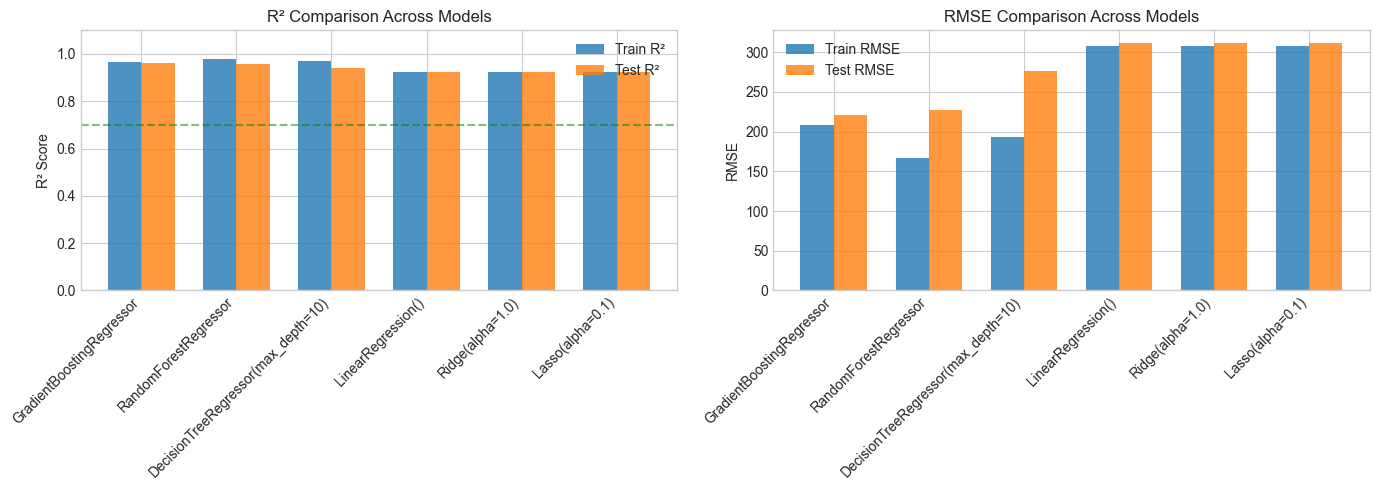

In [23]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Comparison
models = results_df['Model']
x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, results_df['Train R2'], width, label='Train R²', alpha=0.8)
axes[0].bar(x + width/2, results_df['Test R2'], width, label='Test R²', alpha=0.8)
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Comparison Across Models')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim(0, 1.1)
axes[0].axhline(y=0.7, color='green', linestyle='--', alpha=0.5, label='Good threshold')

# RMSE Comparison
axes[1].bar(x - width/2, results_df['Train RMSE'], width, label='Train RMSE', alpha=0.8)
axes[1].bar(x + width/2, results_df['Test RMSE'], width, label='Test RMSE', alpha=0.8)
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE Comparison Across Models')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.show()

### Model Iteration Reflection

*Before selecting your best model, reflect on what you learned:*

**Questions to answer:**
- Which model improved most over the baseline?
- Did any models show signs of overfitting (big train vs test gap)?
- Did regularization (Ridge/Lasso) help or hurt performance?
- Did tree-based models (Decision Tree, Random Forest) work better than linear models?

**Your reflection:**

The "RandomForrestRegressor" was the model that improved the most over the baseline. None of the models showed signs of overfitting, the biggest train vs test was DecisionTreeRegression with a gap of 0.0187. According to the data, "Ridge/Lasso" didn't help or hurt, the results were the same as the baseline. "Decision Tree" and "Random Forrest" both worked better than linear models. 

## Section 9: Feature Importance & Selection

**Important:** Your final model should use only **4-8 features**. This section helps you identify which features matter most.

Feature Importance (Random Forest):
                      Feature  Importance
0                   site area    0.783903
8    structure type_Mixed-Use    0.077013
6              resident count    0.054794
3            utilisation rate    0.037935
7   structure type_Industrial    0.031420
1           water consumption    0.005627
5        issue reolution time    0.002504
2              recycling rate    0.002293
4            air qality index    0.002289
9  structure type_Residential    0.002222


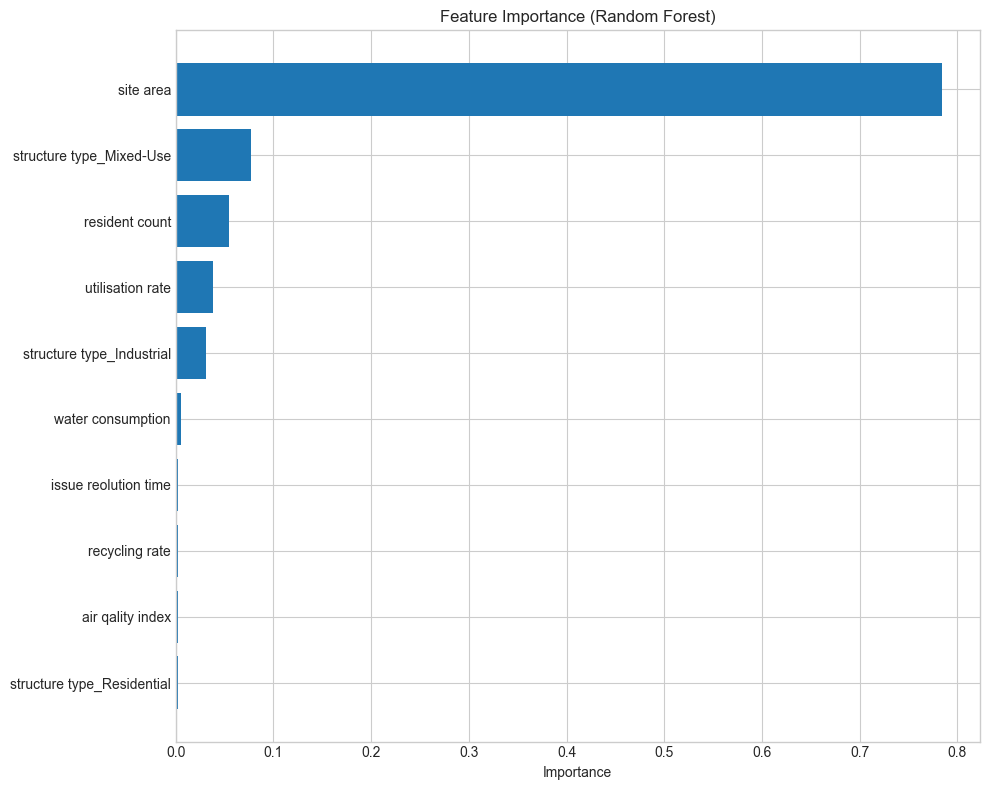

In [24]:
# Get feature importance from Random Forest (works well for this)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_trained.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Random Forest):")
print(rf_importance)

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(rf_importance['Feature'][::-1], rf_importance['Importance'][::-1])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [25]:
# Also check correlations with target
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print("Absolute Correlations with Target:")
print(correlations)

Absolute Correlations with Target:
site area                     0.873392
water consumption             0.697782
resident count                0.363192
structure type_Mixed-Use      0.240326
utilisation rate              0.206496
structure type_Industrial     0.172968
structure type_Residential    0.110309
issue reolution time          0.045527
air qality index              0.016451
recycling rate                0.010812
dtype: float64


In [26]:
# TODO: Select your top features (4-8 features)
#
# Based on the importance analysis above, choose your best features.
# Consider both Random Forest importance AND correlations.
# Also think about what makes sense from a domain perspective.

SELECTED_FEATURES = ['site area', 'water consumption', 'resident count', 'utilisation rate', 'structure type_Industrial', 'structure type_Residential', 'issue reolution time']
    # YOUR FEATURES HERE - add 4-8 feature names:
    # 'feature1',
    # 'feature2',
    # etc.

# Fallback if you haven't selected yet
if len(SELECTED_FEATURES) == 0:
    SELECTED_FEATURES = rf_importance['Feature'].head(6).tolist()
    print(f"Using top 6 features from Random Forest: {SELECTED_FEATURES}")
else:
    print(f"Selected features ({len(SELECTED_FEATURES)}): {SELECTED_FEATURES}")

Selected features (7): ['site area', 'water consumption', 'resident count', 'utilisation rate', 'structure type_Industrial', 'structure type_Residential', 'issue reolution time']


In [27]:
# Retrain with selected features only
X_train_selected = X_train_scaled[SELECTED_FEATURES]
X_test_selected = X_test_scaled[SELECTED_FEATURES]

print(f"Training with {len(SELECTED_FEATURES)} selected features...")

# Test a few models with selected features
selected_results = []

for name, model in [('Linear Regression', LinearRegression()),
                    ('Ridge', Ridge(alpha=1.0)),
                    ('Random Forest', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))]:
    results, trained, _ = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test, name)
    selected_results.append(results)
    print(f"{name} with {len(SELECTED_FEATURES)} features - Test R²: {results['Test R2']:.4f}")

selected_df = pd.DataFrame(selected_results)

Training with 7 selected features...
Linear Regression with 7 features - Test R²: 0.8665
Ridge with 7 features - Test R²: 0.8665
Random Forest with 7 features - Test R²: 0.9593


### Feature Selection Justification

**Questions to answer:**
- Which features did you select and why?
- Did performance drop significantly with fewer features?
- Do these features make sense from a domain perspective?
- These are the features users will input in your Streamlit app—are they reasonable to ask for?

**Your justification:**

Throughout all the various analysis text and visual, site area has consistantly showned to be the feature that has had the most impact of the target variable "electricity cost". Yes, the performance dropped with fewer features even with the ones that showed little impact on the target dropped. From a domain perspective I would have thought that "water consumption" would have had a greater impact on the target value. Yes, they are reasonable to ask for.

## Section 10: Best Model Selection

In [30]:
# TODO: Choose and train your final model with selected features
#
# Based on your analysis, pick the best model type and instantiate it.
# Consider: performance, consistency, simplicity
#
# Example: final_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# YOUR CODE HERE:
# final_model = ...

final_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# --- 1. Select features and target ---
features = [
    'site area',
    'water consumption',
    'resident count',
    'utilisation rate',
    'structure type_Industrial',
    'structure type_Residential',
    'issue reolution time'
]

X = df[features]
y = df['electricity cost']

# Ensure numeric types (especially after one-hot encoding)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# --- 2. Train/test split ---
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 3. Create and train the model ---
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, Y_train)

# --- 4. Evaluate ---
score = model.score(X_test, Y_test)
print(f"RandomForest R² Score: {score}")



RandomForest R² Score: 0.9594666270155042


In [31]:
# Fit and evaluate final model
final_model.fit(X_train_selected, y_train)
y_pred = final_model.predict(X_test_selected)

# Final metrics
final_r2 = r2_score(y_test, y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_mae = mean_absolute_error(y_test, y_pred)

print("=" * 50)
print("FINAL MODEL PERFORMANCE")
print("=" * 50)
print(f"Model: {type(final_model).__name__}")
print(f"Features: {SELECTED_FEATURES}")
print(f"\nTest R²: {final_r2:.4f}")
print(f"Test RMSE: {final_rmse:,.2f}")
print(f"Test MAE: {final_mae:,.2f}")
print(f"\nRMSE as % of target range: {final_rmse/target_range*100:.1f}%")

FINAL MODEL PERFORMANCE
Model: RandomForestRegressor
Features: ['site area', 'water consumption', 'resident count', 'utilisation rate', 'structure type_Industrial', 'structure type_Residential', 'issue reolution time']

Test R²: 0.9593
Test RMSE: 225.39
Test MAE: 179.60

RMSE as % of target range: 3.8%


### Best Model Justification

*Explain why you chose this model as your best:*

**Questions to consider:**
- Why did you select this model over others?
- Is there significant overfitting (train vs test gap)?
- How does the performance compare to your baseline?
- Would a simpler model be almost as good?
- Does the RMSE represent acceptable prediction error for your problem?

**Your justification:**

When all the models statistical data was analyzed and compared, RandomForrestRegressor consistantly had the strongest outcomes, showed no significant overfitting and had the most improvement over the baseline. No, the simpler models (linear,lasso,ridge) had significantly lower scores. The RMSE of only 3.8% indicates that the chosen features are highly predictive, low noise, and that the model is highly accurate.

## Section 11: Best Model Analysis

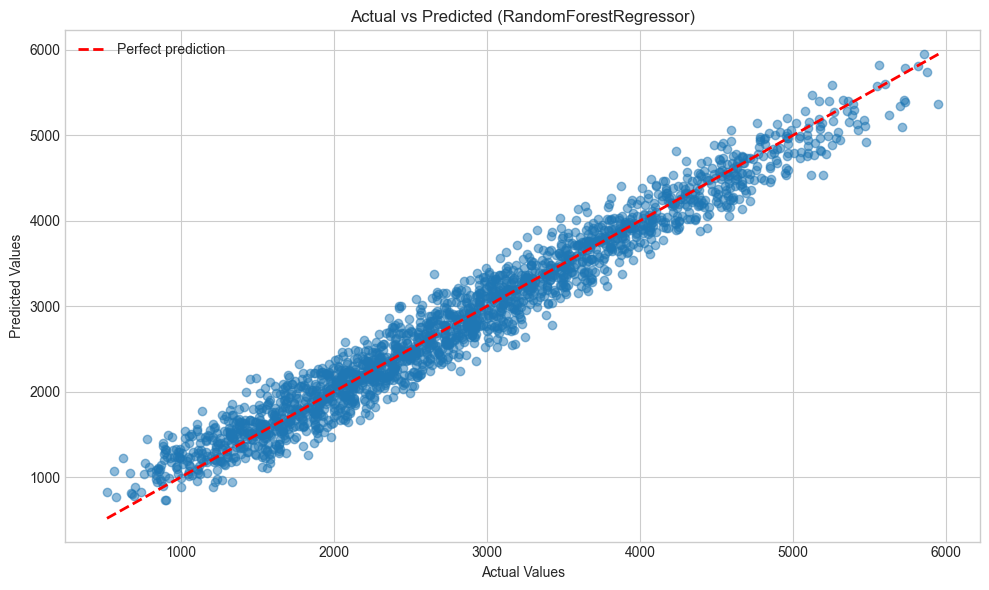

In [32]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted ({type(final_model).__name__})')
plt.legend()
plt.tight_layout()
plt.show()

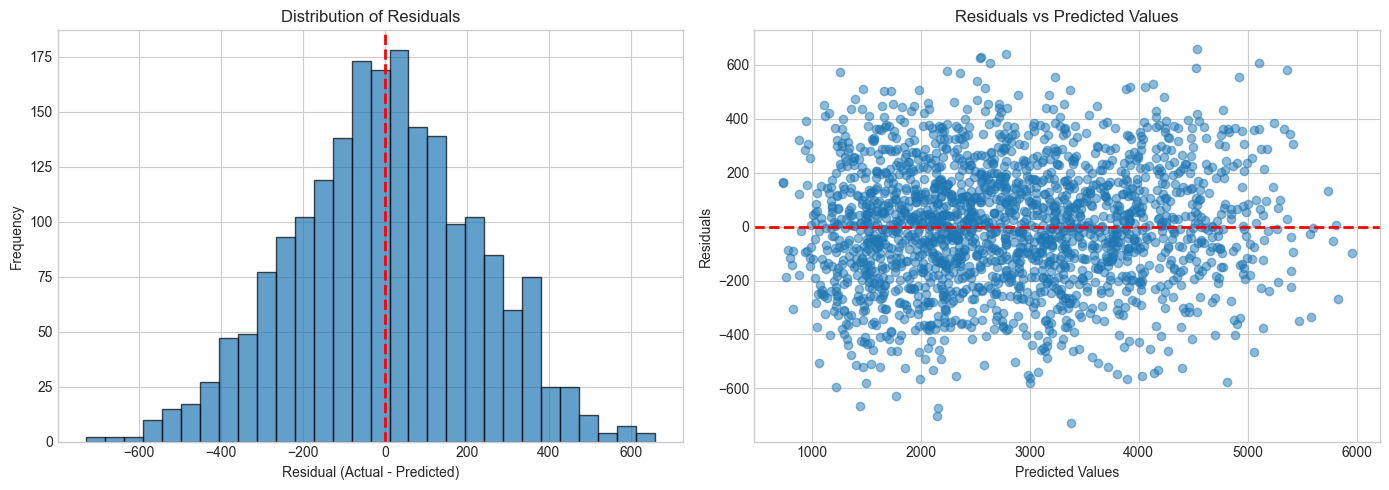

Residual mean (should be ~0): -0.01
Residual std: 225.45


In [33]:
# Residual analysis
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual distribution (should be roughly normal, centered at 0)
axes[0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residual (Actual - Predicted)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Residuals')

# Residuals vs Predicted (should show no pattern)
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()

print(f"Residual mean (should be ~0): {residuals.mean():.2f}")
print(f"Residual std: {residuals.std():,.2f}")

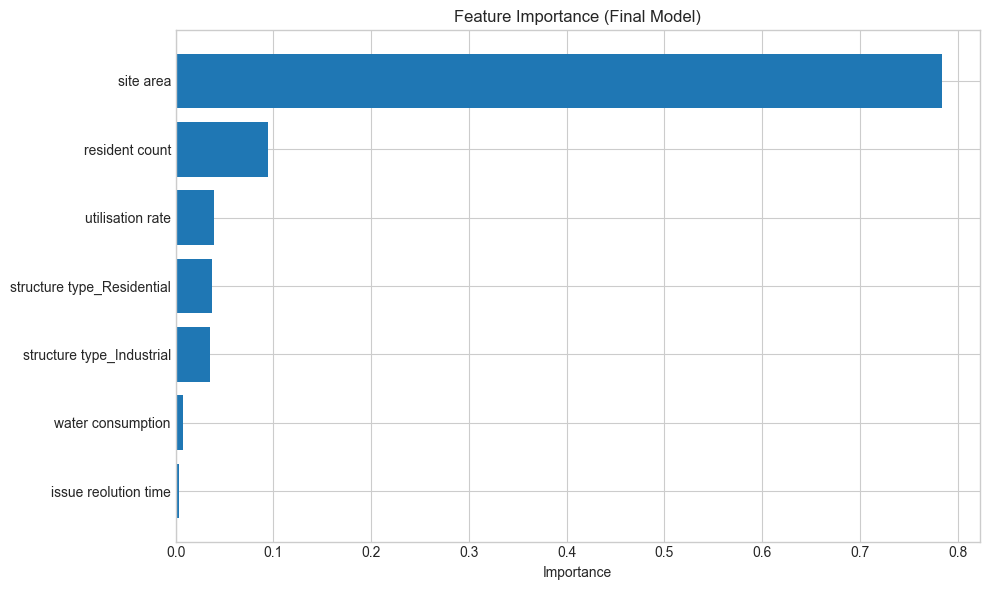

In [34]:
# Feature importance for final model (with selected features)
if hasattr(final_model, 'feature_importances_'):
    final_importance = pd.DataFrame({
        'Feature': SELECTED_FEATURES,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(final_importance['Feature'], final_importance['Importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance (Final Model)')
    plt.tight_layout()
    plt.show()
elif hasattr(final_model, 'coef_'):
    final_importance = pd.DataFrame({
        'Feature': SELECTED_FEATURES,
        'Coefficient': final_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=True)
    
    plt.figure(figsize=(10, 6))
    colors = ['green' if c > 0 else 'red' for c in final_importance['Coefficient']]
    plt.barh(final_importance['Feature'], final_importance['Coefficient'], color=colors)
    plt.xlabel('Coefficient')
    plt.title('Feature Coefficients (Final Model)')
    plt.tight_layout()
    plt.show()

## Section 12: Save Model and Artifacts

In [35]:
# Create a new scaler fitted only on selected features
final_scaler = StandardScaler()
X_train_final = X_train[SELECTED_FEATURES]
final_scaler.fit(X_train_final)

# Save the best model
model_path = '../models/regression_model.pkl'
joblib.dump(final_model, model_path)
print(f"Model saved to {model_path}")

# Save the scaler (fitted on selected features only)
scaler_path = '../models/regression_scaler.pkl'
joblib.dump(final_scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

# Save feature names (the selected features for Streamlit app)
features_path = '../models/regression_features.pkl'
joblib.dump(SELECTED_FEATURES, features_path)
print(f"Features saved to {features_path}")

Model saved to ../models/regression_model.pkl
Scaler saved to ../models/regression_scaler.pkl
Features saved to ../models/regression_features.pkl


In [36]:
# Verify saved model works
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)
loaded_features = joblib.load(features_path)

# Test prediction
test_sample = X_test[loaded_features].iloc[[0]]
test_sample_scaled = loaded_scaler.transform(test_sample)
test_pred = loaded_model.predict(test_sample_scaled)

print(f"\nModel verification:")
print(f"Features used: {loaded_features}")
print(f"Sample input: {test_sample.values[0]}")
print(f"Predicted: {test_pred[0]:,.2f}")
print(f"Actual: {y_test.iloc[0]:,.2f}")
print(f"\nModel saved and verified successfully!")


Model verification:
Features used: ['site area', 'water consumption', 'resident count', 'utilisation rate', 'structure type_Industrial', 'structure type_Residential', 'issue reolution time']
Sample input: [1447 1000.0 0 69 True False 65]
Predicted: 2,384.47
Actual: 2,027.00

Model saved and verified successfully!


## Section 13: Binning Strategy for Classification

**IMPORTANT:** Before you start Notebook 03, you need to send your binning strategy to Abishek on Slack for approval by **Feb 15**.

### Analyze Target Distribution

In [37]:
# Look at target distribution to help decide binning
print(f"Target: {TARGET}")
print(f"\nDescriptive Statistics:")
print(y.describe())

print(f"\nPercentiles:")
for p in [10, 25, 33, 50, 67, 75, 90]:
    print(f"{p}th percentile: {y.quantile(p/100):,.2f}")

Target: electricity cost

Descriptive Statistics:
count    10000.000000
mean      2837.845000
std       1106.997441
min        500.000000
25%       1954.000000
50%       2760.000000
75%       3632.000000
max       6446.000000
Name: electricity cost, dtype: float64

Percentiles:
10th percentile: 1,426.90
25th percentile: 1,954.00
33th percentile: 2,214.67
50th percentile: 2,760.00
67th percentile: 3,333.33
75th percentile: 3,632.00
90th percentile: 4,368.10


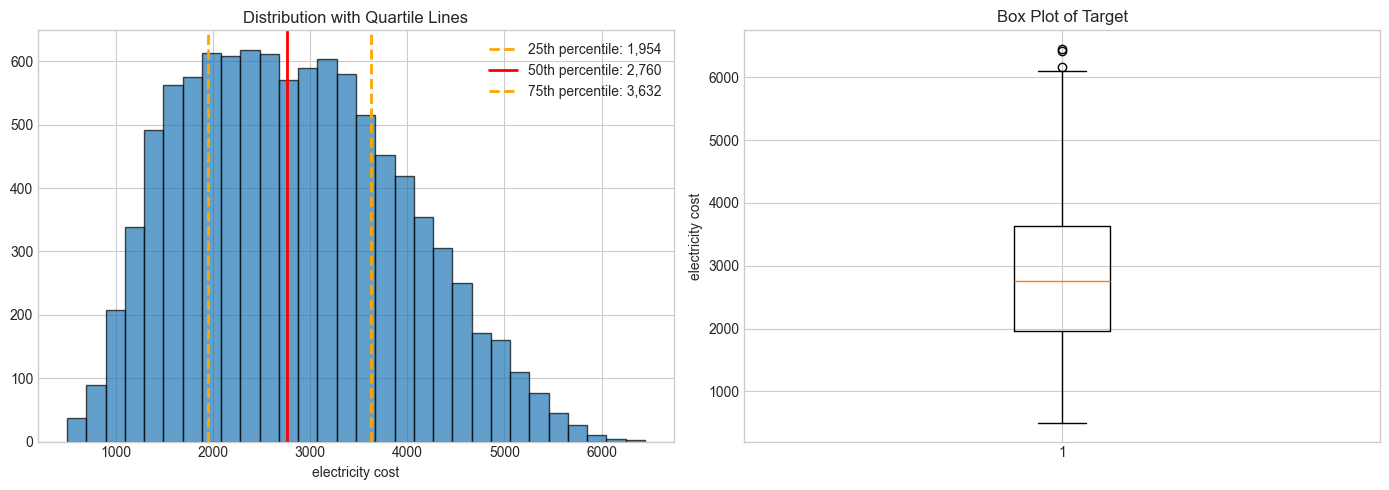

In [38]:
# Visualize potential binning strategies
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with quartile lines
axes[0].hist(y, bins=30, edgecolor='black', alpha=0.7)
for p, color, style in [(25, 'orange', '--'), (50, 'red', '-'), (75, 'orange', '--')]:
    axes[0].axvline(y.quantile(p/100), color=color, linestyle=style, linewidth=2,
                     label=f'{p}th percentile: {y.quantile(p/100):,.0f}')
axes[0].set_xlabel(TARGET)
axes[0].set_title('Distribution with Quartile Lines')
axes[0].legend()

# Box plot
axes[1].boxplot(y)
axes[1].set_ylabel(TARGET)
axes[1].set_title('Box Plot of Target')

plt.tight_layout()
plt.show()

### Proposed Binning Strategy

*Complete this section and send to Abishek on Slack by Feb 15:*

**1. How many categories will you create?**

I plan to create three categorical bins low, medium, high based on "electricity cost".

**2. What are your bin thresholds?**

Low < 1954,  medium 1955 - 3632,  high > 3633

**3. Why does this binning make sense for your problem?**

This binning makes sense because it is based on distribution statistical data (histograms and boxplots).

In [39]:
# Preview your binning
def create_bins_preview(y, strategy='quartile'):
    if strategy == 'quartile':
        bins = [y.min()-1, y.quantile(0.25), y.quantile(0.75), y.max()+1]
        labels = ['Low', 'Medium', 'High']
    elif strategy == 'tertile':
        bins = [y.min()-1, y.quantile(0.33), y.quantile(0.67), y.max()+1]
        labels = ['Low', 'Medium', 'High']
    # Add your custom strategy here if needed
    
    return pd.cut(y, bins=bins, labels=labels)

# Preview with quartile binning
y_binned = create_bins_preview(y, 'quartile')
print("Preview of binned target (using quartiles):")
print(y_binned.value_counts().sort_index())
print(f"\nPercentages:")
print((y_binned.value_counts(normalize=True) * 100).round(1).sort_index())

Preview of binned target (using quartiles):
electricity cost
Low       2501
Medium    5002
High      2497
Name: count, dtype: int64

Percentages:
electricity cost
Low       25.0
Medium    50.0
High      25.0
Name: proportion, dtype: float64


---

## Summary

### What You Accomplished
- [ ] Loaded and prepared cleaned data
- [ ] Split data into train and test sets
- [ ] Scaled features appropriately
- [ ] Built a baseline model
- [ ] Tried multiple model types
- [ ] Performed cross-validation
- [ ] Selected top 4-8 features
- [ ] Compared and selected best model
- [ ] Analyzed model performance (residuals, feature importance)
- [ ] Saved model, scaler, and feature list
- [ ] Planned binning strategy for classification

### Key Results

**Best Model:** [RandomForrest]

**Selected Features:** ['site area', 'water consumption', 'resident count', 'utilisation rate', 'structure type_Industrial', 'structure type_Residential', 'issue reolution time']

**Test R²:** [0.95946]

**Test RMSE:** [225.39]

<small>**Improvement over baseline:** [The RandomForrest test score is 4.0% better than the baseline]
---

---

## Checkpoint 3 Submission Instructions

**Congratulations!** You've completed Checkpoint 3 (Regression Model).

### Step 1: Save This Notebook
- File -> Save (or Ctrl+S / Cmd+S)

### Step 2: Send Binning Strategy to Abishek
- Message Abishek on Slack with your binning strategy
- Include: number of categories, thresholds, and justification

### Step 3: Commit to GitHub

```bash
# Stage your changes
git add notebooks/02_regression_model.ipynb
git add models/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 3: Regression model with feature selection"

# Push to GitHub
git push
```

### Step 4: Submit to Canvas
1. Go to the Checkpoint 3 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

1. **Wait for binning approval** from Abishek
2. Move on to **Notebook 03: Classification Model**

---